<a href="https://colab.research.google.com/github/Geethaarumugam-DSP/DataScientist/blob/main/Decision_tree_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv(r'titanic.csv', index_col='PassengerId')

In [19]:
df.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]

In [20]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [21]:
df

Pclass     Sex   Age  SibSp  Parch     Fare  Survived
PassengerId                                                       
1                 3    male  22.0      1      0   7.2500         0
2                 1  female  38.0      1      0  71.2833         1
3                 3  female  26.0      0      0   7.9250         1
4                 1  female  35.0      1      0  53.1000         1
5                 3    male  35.0      0      0   8.0500         0
...             ...     ...   ...    ...    ...      ...       ...
887               2    male  27.0      0      0  13.0000         0
888               1  female  19.0      0      0  30.0000         1
889               3  female   NaN      1      2  23.4500         0
890               1    male  26.0      0      0  30.0000         1
891               3    male  32.0      0      0   7.7500         0

[891 rows x 7 columns]

In [22]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [23]:
df = df.dropna()

In [24]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=1)

In [26]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(X, y)
y_predict= model1.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predict)

0.9859943977591037

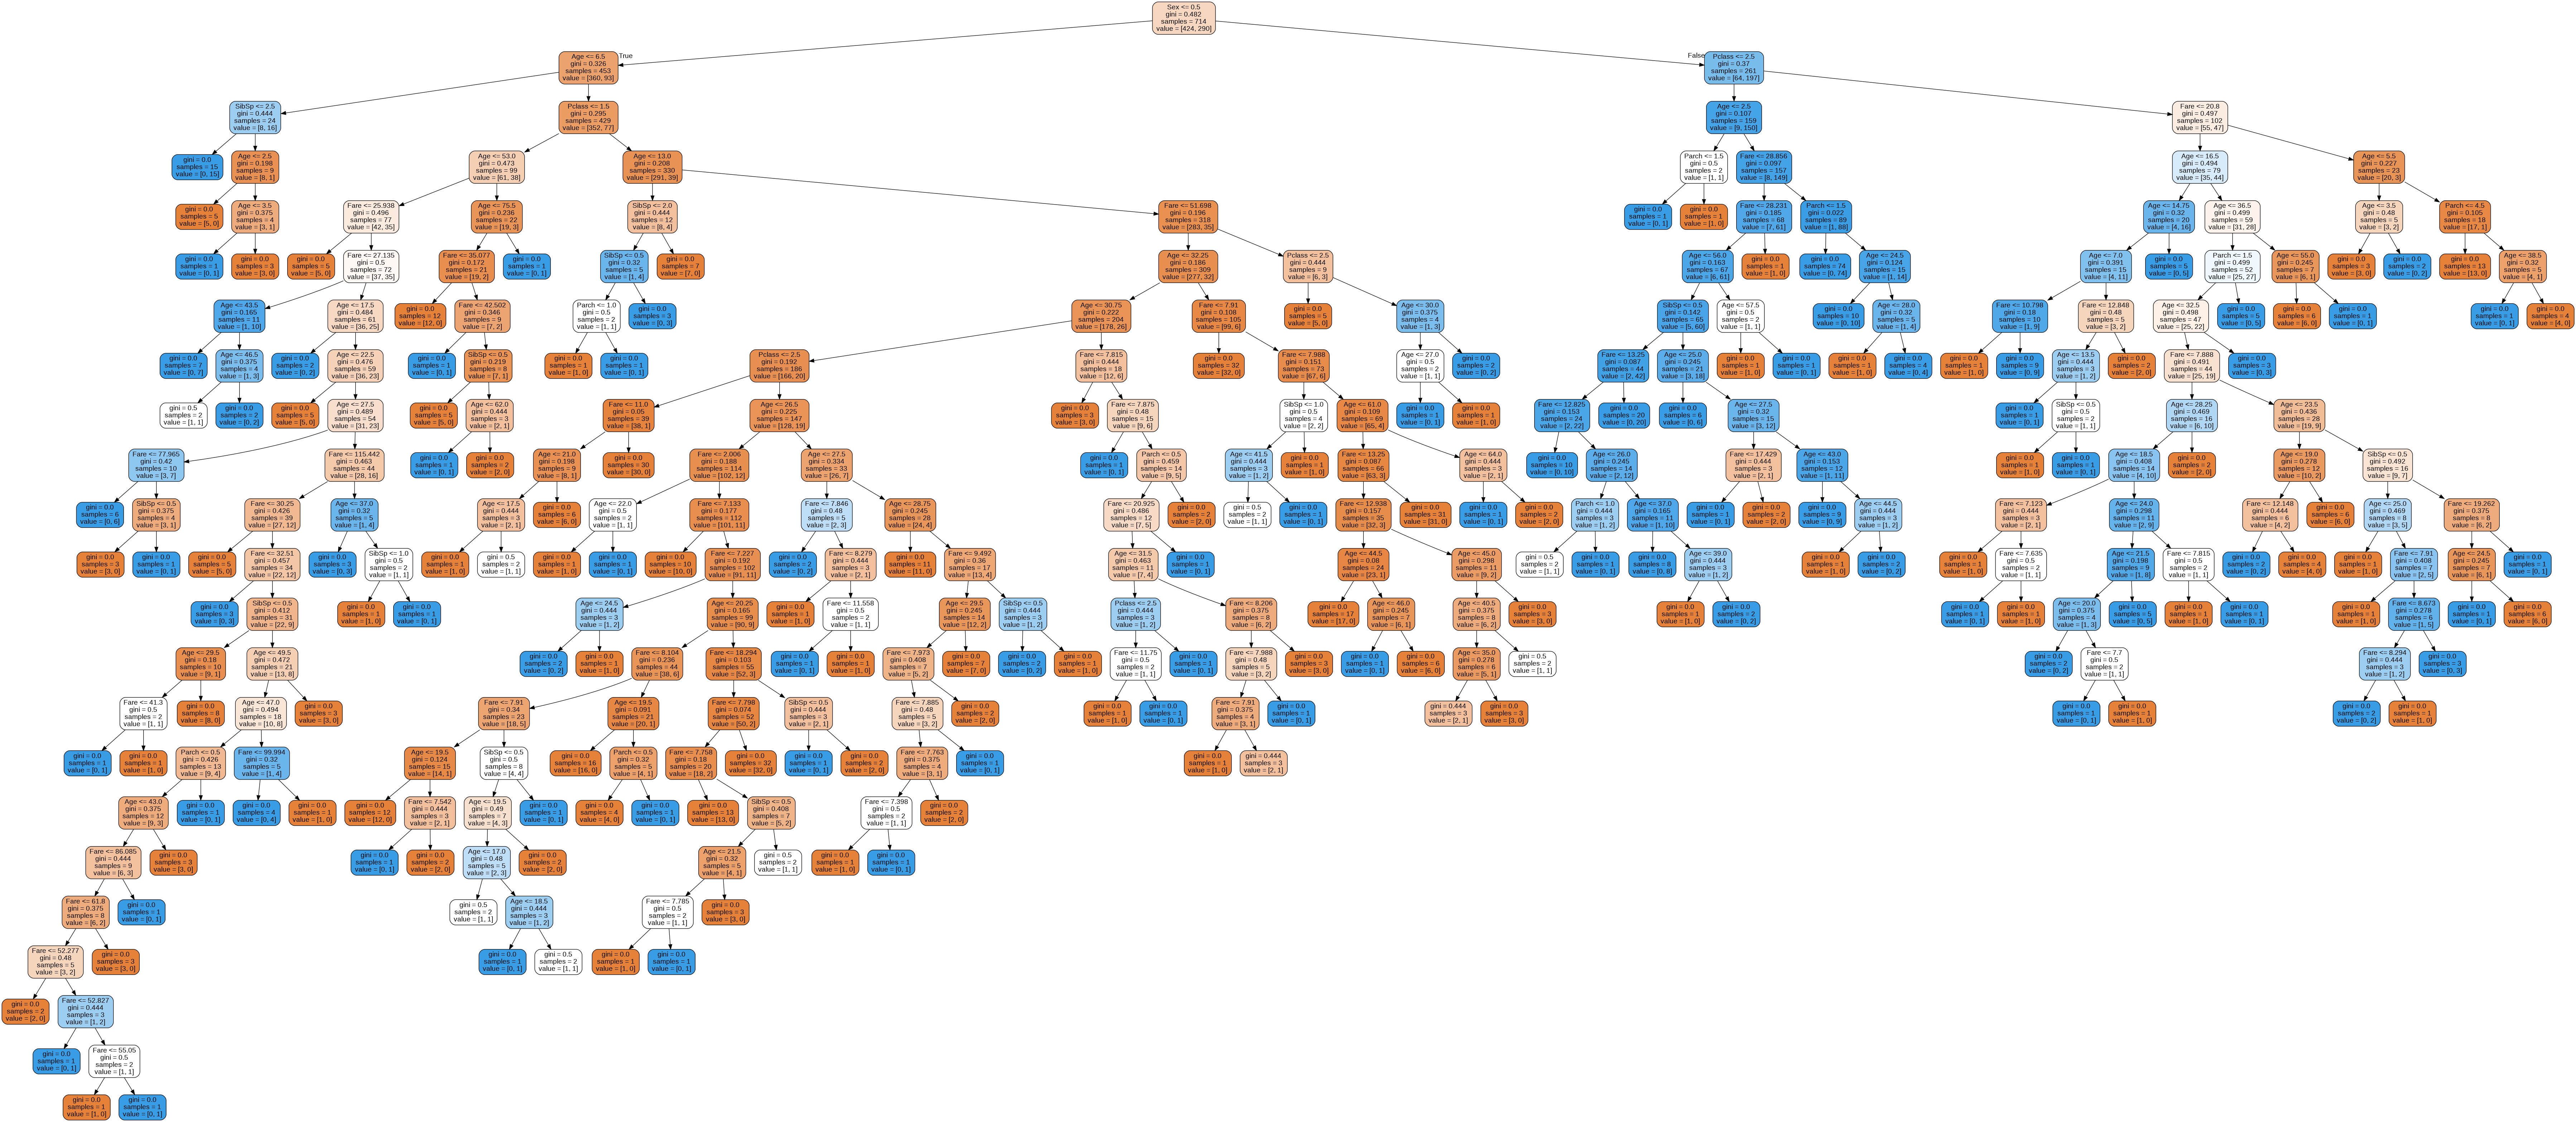

In [30]:
dot_data = tree.export_graphviz(model1, feature_names = X.columns, out_file ='tree.dot', filled = True, rounded = True)
!dot -Tpng tree.dot > tree1.png # image
from IPython.display import  Image
Image(filename = 'tree1.png')

In [31]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)


0.8324022346368715

In [32]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['Predicted Not Survival', 'Predicted Survival'], index=['True Not Survival', 'True Survival'])

Predicted Not Survival  Predicted Survival
True Not Survival                      98                  14
True Survival                          16                  51

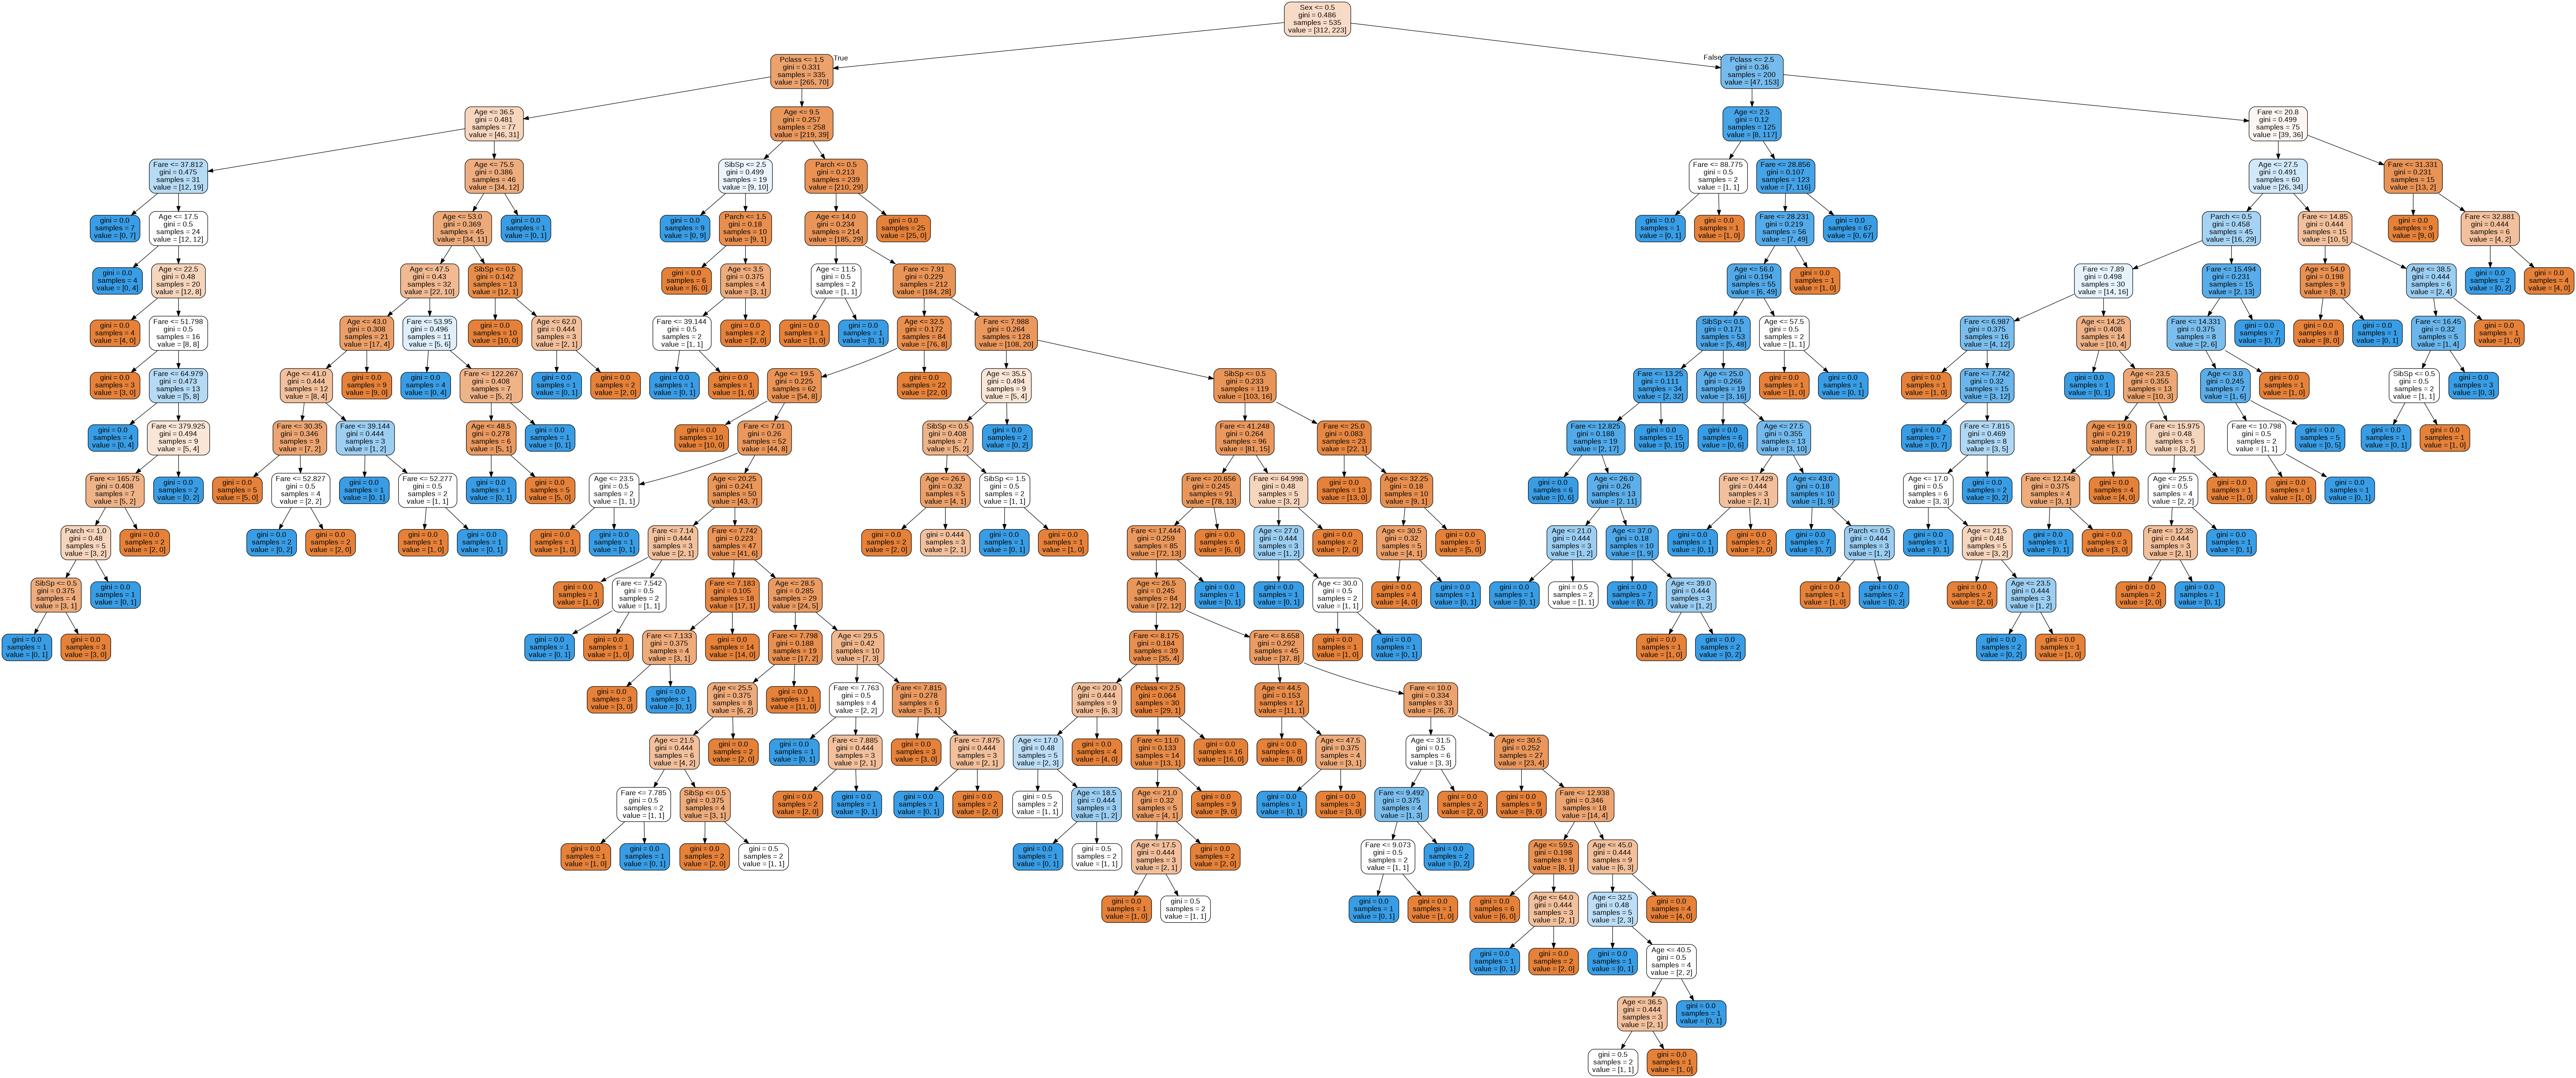

In [35]:
dot_data = tree.export_graphviz(model, feature_names = X.columns, out_file ='tree.dot', filled = True, rounded = True)
!dot -Tpng tree.dot > tree.png # image
from IPython.display import  Image
Image(filename = 'tree.png')

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [39]:
y.value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[102  10]
 [ 16  51]]
0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       112
           1       0.84      0.76      0.80        67

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [41]:
model=RandomForestClassifier(n_estimators=300,
                             criterion='entropy',
                             max_features='sqrt',
                             min_samples_leaf=10,
            random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[107   5]
 [ 20  47]]
0.8603351955307262
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       112
           1       0.90      0.70      0.79        67

    accuracy                           0.86       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.87      0.86      0.86       179



In [42]:
[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [43]:
[int(x) for x in np.linspace(10, 1000,10)]

[10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]

In [44]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in 
        np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [45]:
rf=RandomForestClassifier()   
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [47]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 400}

In [48]:
rf_randomcv

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [49]:
rf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
best_random_grid=rf_randomcv.best_estimator_

In [51]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 400}

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 150, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [10], 'max_features': ['log2'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [5, 6, 7, 8, 9], 'n_estimators': [250, 300, 400, 500, 600]}


In [53]:
1*1*1*3*5*5

75

In [54]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [55]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
best_grid=grid_search.best_estimator_

In [57]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[106   6]
 [ 19  48]]
Accuracy Score 0.8603351955307262
Classification report:               precision    recall  f1-score   support

           0       0.85      0.95      0.89       112
           1       0.89      0.72      0.79        67

    accuracy                           0.86       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



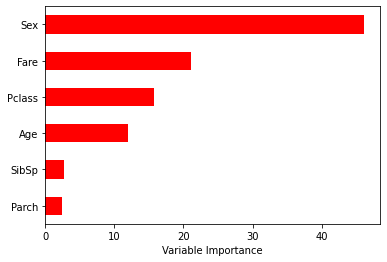

In [61]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None